In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
features = pd.read_csv(r"C:\Users\jawri\Data course\Capstone\CORDIS data\Projects\project_features_clean.csv")

# Define features and target
exclude_cols = ['projectID', 'num_citations', 'num_publications', 'num_patents', 'total_output']
feature_cols = [col for col in features.columns if col not in exclude_cols]

X_pub = features[feature_cols]
y_pub = features['num_publications']

# Train model with best params
best_rf_pub = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
best_rf_pub.fit(X_pub, y_pub)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   47.6s finished


RandomForestRegressor(min_samples_split=5, n_estimators=200, n_jobs=-1,
                      random_state=42, verbose=1)

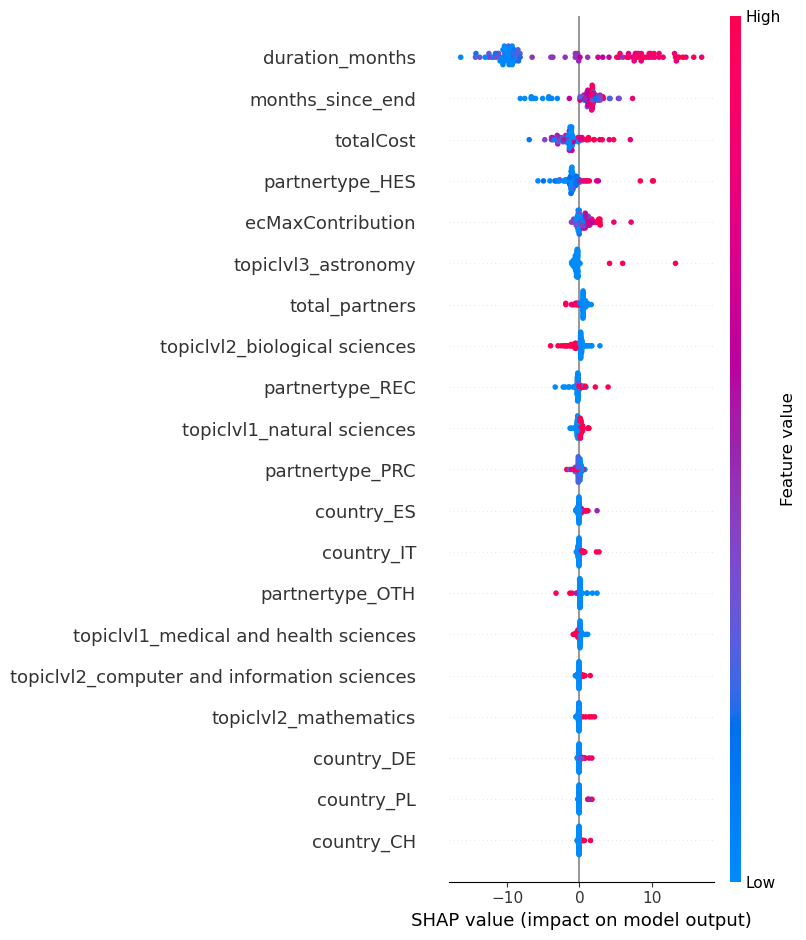

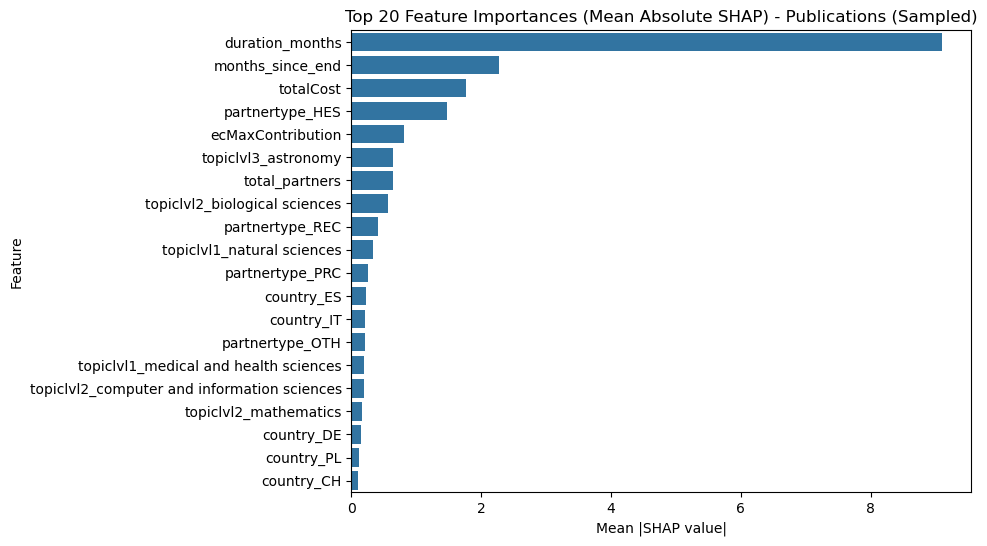

In [5]:
# Sample for SHAP
X_sample = X_pub.sample(100, random_state=42)

# SHAP explainer and values
explainer_pub = shap.TreeExplainer(best_rf_pub)
shap_values_pub = explainer_pub.shap_values(X_sample)

# Summary plot
shap.summary_plot(shap_values_pub, X_sample)

# Mean absolute SHAP values and bar plot
mean_abs_shap_pub = np.abs(shap_values_pub).mean(axis=0)
feature_importance_pub = pd.DataFrame({'feature': X_sample.columns, 'importance': mean_abs_shap_pub}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance_pub.head(20))
plt.title('Top 20 Feature Importances (Mean Absolute SHAP) - Publications (Sampled)')
plt.xlabel('Mean |SHAP value|')
plt.ylabel('Feature')
plt.show()


In [7]:
mean_publications = features['num_publications'].mean()
std_publications = features['num_publications'].std()
median_publications = features['num_publications'].median()

print(f"Mean publications: {mean_publications}")
print(f"Std publications: {std_publications}")
print(f"Median publications: {median_publications}")



Mean publications: 11.31210805595755
Std publications: 26.130315238471656
Median publications: 3.0
